In [502]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(7.7, 5.25)})
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

## Data Cleaning

In [503]:
#Read certain columns for the CSV file into a dataframe
df=pd.read_csv('C:/Users/tanis/Documents/C1/llcp2021.csv', usecols=['_PRACE1','_HISPANC','_SEX', '_AGEG5YR','_EDUCAG','INCOME3', '_BMI5','_BMI5CAT'])

# Exclude the rows for columns with null values
df = df.dropna(subset=['_BMI5','_BMI5CAT','_PRACE1','_HISPANC', 'INCOME3', '_EDUCAG'])

#Exclude the rows where _AGE5YR = 14
df=df[df._AGEG5YR != 14]
df['_BMI5'] = df['_BMI5'].div(100).round(2)


In [504]:
# Get the dataframe dimentions
df.shape

(387015, 8)

In [505]:
# Print general stats on the dataframe using all elements within it
df.describe()

,INCOME3,_PRACE1,_HISPANC,_SEX,_AGEG5YR,_BMI5,_BMI5CAT,_EDUCAG
count,387015.000000,387015.000000,387015.000000,387015.000000,387015.000000,387015.000000,387015.000000,387015.000000
mean,20.597845,3.383068,1.979502,1.515688,7.622857,28.568045,3.010180,3.053525
std,31.118084,13.248015,0.729693,0.499754,3.563130,6.558789,0.833213,0.981441
min,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,1.000000
25%,6.000000,1.000000,2.000000,1.000000,5.000000,24.140000,2.000000,2.000000
50%,7.000000,1.000000,2.000000,2.000000,8.000000,27.440000,3.000000,3.000000
75%,10.000000,1.000000,2.000000,2.000000,11.000000,31.750000,4.000000,4.000000
max,99.000000,99.000000,9.000000,2.000000,13.000000,99.330000,4.000000,9.000000


In [506]:
# Drop 'missing' and 'do not know values' for _EDUCAG, INCOME3, _HISPANC and _PRACE1 columns
df = df[df["_EDUCAG"] != 9]
df = df[(df["INCOME3"] != 77) & (df["INCOME3"] != 99)]
df = df[(df["_PRACE1"] != 77) & (df["_PRACE1"] != 99)]
df = df[df["_HISPANC"] != 9]

In [507]:
#View part of dataframe
df.head(15)

,INCOME3,_PRACE1,_HISPANC,_SEX,_AGEG5YR,_BMI5,_BMI5CAT,_EDUCAG
0,5.0,1.0,2.0,2.0,11.0,14.54,1.0,2.0
2,3.0,2.0,2.0,2.0,11.0,28.29,3.0,2.0
3,7.0,1.0,2.0,2.0,9.0,33.47,4.0,2.0
4,4.0,1.0,2.0,1.0,12.0,28.73,3.0,1.0
5,6.0,1.0,2.0,1.0,13.0,24.37,2.0,3.0
9,8.0,1.0,2.0,2.0,10.0,39.94,4.0,2.0
10,3.0,1.0,2.0,2.0,10.0,27.46,3.0,3.0
16,5.0,1.0,2.0,2.0,9.0,17.85,1.0,2.0
17,7.0,1.0,2.0,1.0,12.0,23.92,2.0,4.0
19,6.0,1.0,2.0,2.0,7.0,29.86,3.0,2.0


In [508]:
#Replace numeric values with their categorical values
ndf=df.replace({'_PRACE1': {1:'White', 
                            2:'Black or African American', 
                            3:'American Indian or Alaskan Native', 
                            4:'Asian',
                            5:'Native Hawaiian or other Pacific Islander',
                            6:'Other race',
                            7:'No preferred race', 
                            8:'Multiracial but preferred race not answered'},
                '_HISPANC':{1:'Hispanic, Latino/a, or Spanish origin', 
                            2:'Not of Hispanic, Latino/a, or Spanish origin'}, 
                '_SEX':{1:'Male', 
                        2:'Female'}, 
                '_AGEG5YR':{1:'Age 18 to 24', 
                            2:'Age 25 to 29', 
                            3:'Age 30 to 34', 
                            4:'Age 35 to 39',
                            5:'Age 40 to 44', 
                            6:'Age 45 to 49',
                            7:'Age 50 to 54',
                            8:'Age 55 to 59',
                            9:'Age 60 to 64', 
                            10:'Age 65 to 69', 
                            11:'Age 70 to 74', 
                            12:'Age 75 to 79',
                            13:'Age 80 or older'}, 
                '_EDUCAG':{1:'Did not graduate High School', 
                           2:'Graduated High School',
                           3:'Attended College or Technical School', 
                           4:'Graduated from College or Technical School'},
               'INCOME3': {1:"Less than $10,000", 
                           2:"$10,000 to < $15,000", 
                           3:"$15,000 to < $20,000",
                           4:"$20,000 to < $25,000", 
                           5:"$25,000 to < $35,000", 
                           6:"$35,000 to < $50,000", 
                           7:"$50,000 to < $75,000", 
                           8:"$75,000 to < $100,000", 
                           9:"$100,000 to < $150,000", 
                           10:"$150,000 to < $200,000",
                           11:"$200,000 or more"}})

In [509]:
#View part of dataframe
ndf.head()

,INCOME3,_PRACE1,_HISPANC,_SEX,_AGEG5YR,_BMI5,_BMI5CAT,_EDUCAG
0,"$25,000 to < $35,000",White,"Not of Hispanic, Latino/a, or Spanish origin",Female,Age 70 to 74,14.54,1.0,Graduated High School
2,"$15,000 to < $20,000",Black or African American,"Not of Hispanic, Latino/a, or Spanish origin",Female,Age 70 to 74,28.29,3.0,Graduated High School
3,"$50,000 to < $75,000",White,"Not of Hispanic, Latino/a, or Spanish origin",Female,Age 60 to 64,33.47,4.0,Graduated High School
4,"$20,000 to < $25,000",White,"Not of Hispanic, Latino/a, or Spanish origin",Male,Age 75 to 79,28.73,3.0,Did not graduate High School
5,"$35,000 to < $50,000",White,"Not of Hispanic, Latino/a, or Spanish origin",Male,Age 80 or older,24.37,2.0,Attended College or Technical School


In [510]:
#Write dataframe to a new csv file
ndf.to_csv('C:/Users/tanis/Documents/C1/clean_2021.csv')

## Histograph showing BMI in relation to Sex

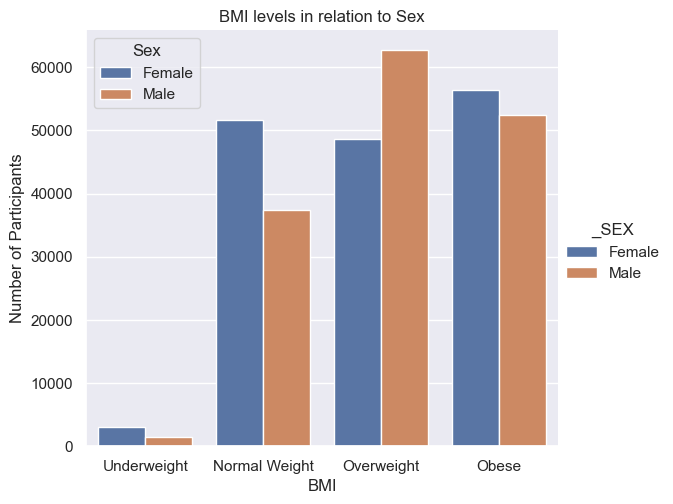

In [511]:
sns.catplot(data=ndf.replace({'_BMI5CAT':{1:'Underweight', 2:'Normal Weight', 3:'Overweight', 4:'Obese'}}), 
             x='_BMI5CAT', hue="_SEX", order= ['Underweight','Normal Weight','Overweight','Obese'], kind="count", aspect=1.18)

plt.title('BMI levels in relation to Sex')
plt.ylabel('Number of Participants')
plt.xlabel('BMI')
plt.legend(title='Sex')

## Line graph showing BMI in relation to Race and Sex

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'White'),
  Text(1, 0, 'Black or African American'),
  Text(2, 0, 'American Indian or Alaskan Native'),
  Text(3, 0, 'Other race'),
  Text(4, 0, 'Asian'),
  Text(5, 0, 'No preferred race'),
  Text(6, 0, 'Native Hawaiian or other Pacific Islander'),
  Text(7, 0, 'Multiracial but preferred race not answered')])

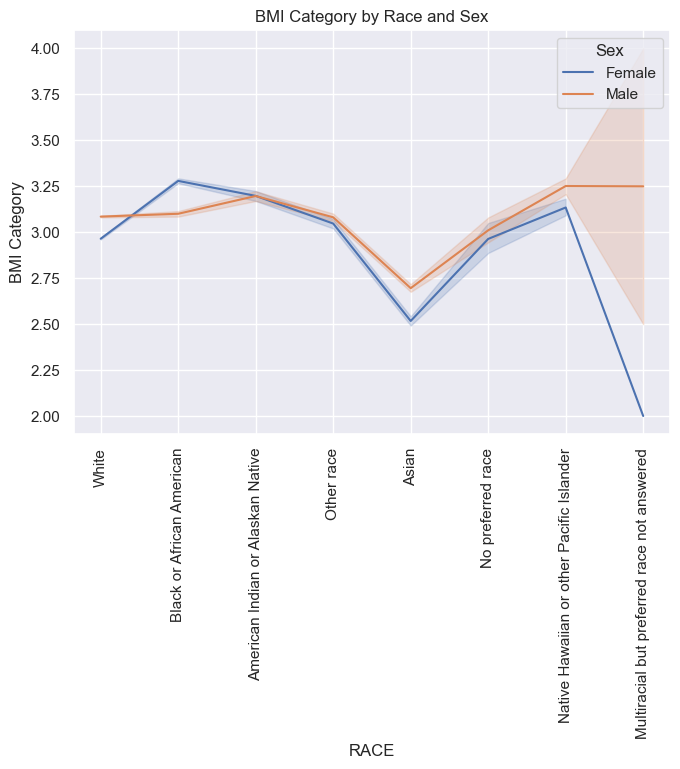

In [512]:
sns.lineplot(data=ndf, x='_PRACE1', y='_BMI5CAT', legend='auto', hue='_SEX')
plt.xticks(rotation=90)
plt.title('BMI Category by Race and Sex')
plt.xlabel('RACE')
plt.ylabel('BMI Category')
plt.legend(title='Sex')
plt.xticks(rotation=90)

## Boxplot showing Obesity in relation to income levels

Text(0, 0.5, 'BMI')

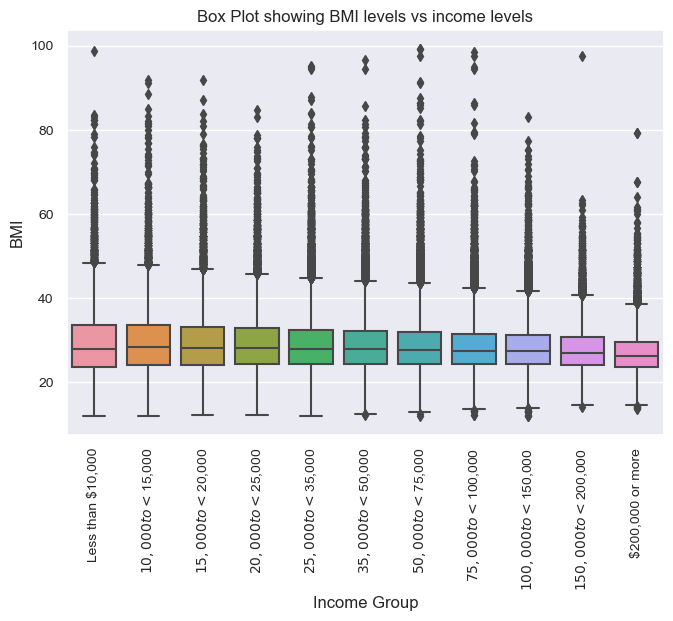

In [513]:
sns.boxplot(x='INCOME3', y='_BMI5', data=ndf, order= ["Less than $10,000", "$10,000 to < $15,000", 
                            "$15,000 to < $20,000",
                            "$20,000 to < $25,000", 
                            "$25,000 to < $35,000", 
                            "$35,000 to < $50,000", 
                            "$50,000 to < $75,000", 
                            "$75,000 to < $100,000", 
                            "$100,000 to < $150,000", 
                            "$150,000 to < $200,000",
                            "$200,000 or more"])
plt.xticks(rotation=90, size=10)
plt.yticks(size=10)
plt.title('Box Plot showing BMI levels vs income levels')
plt.xlabel('Income Group')
plt.ylabel('BMI')

Text(0, 0.5, 'BMI Category')

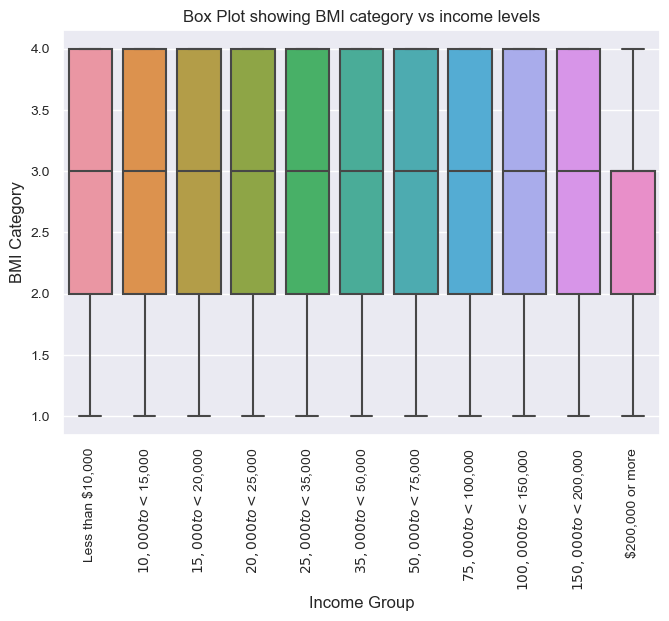

In [514]:
sns.boxplot(x='INCOME3', y='_BMI5CAT', data=ndf, order= ["Less than $10,000", "$10,000 to < $15,000", 
                            "$15,000 to < $20,000",
                            "$20,000 to < $25,000", 
                            "$25,000 to < $35,000", 
                            "$35,000 to < $50,000", 
                            "$50,000 to < $75,000", 
                            "$75,000 to < $100,000", 
                            "$100,000 to < $150,000", 
                            "$150,000 to < $200,000",
                            "$200,000 or more"])
plt.xticks(rotation=90, size=10)
plt.yticks(size=10)
plt.title('Box Plot showing BMI category vs income levels')
plt.xlabel('Income Group')
plt.ylabel('BMI Category')

## Histograph showing income levels of participants

Text(-8.805555555555555, 0.5, 'Participants')

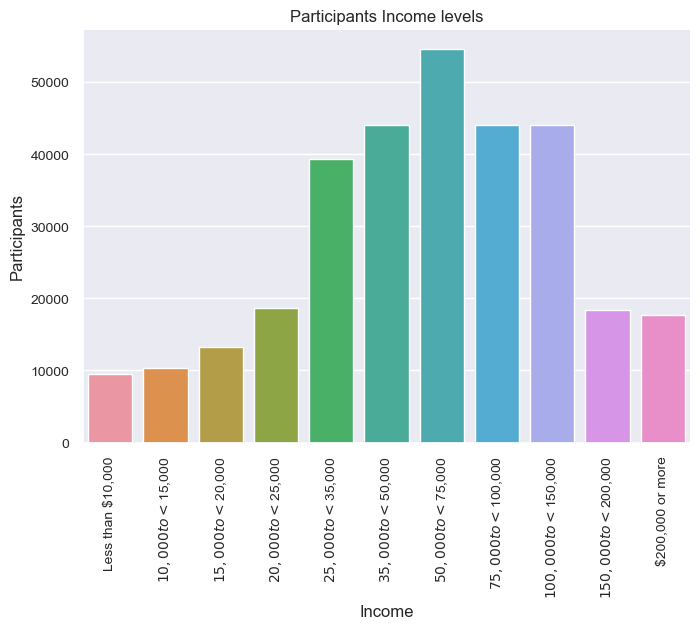

In [515]:
sns.catplot(data=ndf, x='INCOME3', order= ["Less than $10,000", "$10,000 to < $15,000", 
                            "$15,000 to < $20,000",
                            "$20,000 to < $25,000", 
                            "$25,000 to < $35,000", 
                            "$35,000 to < $50,000", 
                            "$50,000 to < $75,000", 
                            "$75,000 to < $100,000", 
                            "$100,000 to < $150,000", 
                            "$150,000 to < $200,000",
                            "$200,000 or more"], kind='count', aspect=1.5)

plt.xticks(rotation=90, size=10)
plt.yticks(size=10)
plt.yticks(size=10)
plt.title('Participants Income levels')
plt.xlabel('Income')
plt.ylabel('Participants')

## Strip plot showing BMI in relation to income levels

Text(0, 0.5, 'BMI')

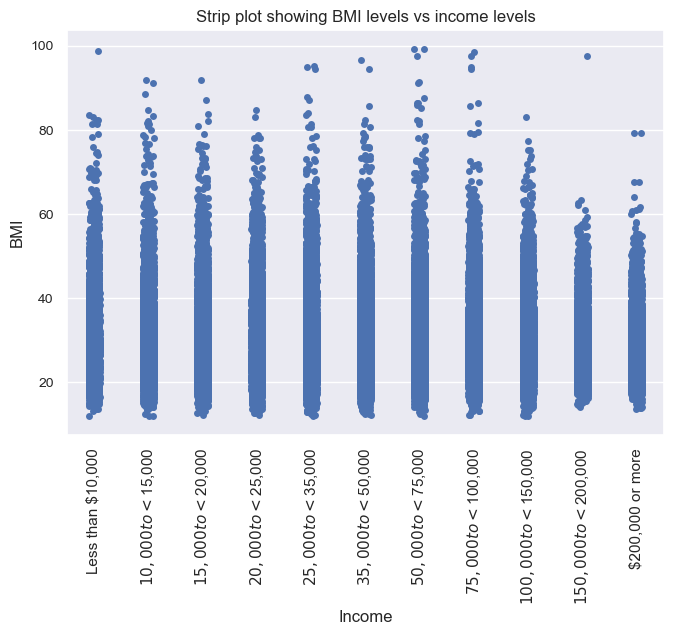

In [516]:
sns.stripplot(y='_BMI5', x='INCOME3', data=ndf, order= ["Less than $10,000", "$10,000 to < $15,000", 
                            "$15,000 to < $20,000",
                            "$20,000 to < $25,000", 
                            "$25,000 to < $35,000", 
                            "$35,000 to < $50,000", 
                            "$50,000 to < $75,000", 
                            "$75,000 to < $100,000", 
                            "$100,000 to < $150,000", 
                            "$150,000 to < $200,000",
                            "$200,000 or more"])
plt.xticks(rotation=90)
plt.yticks(size=10)
plt.title('Strip plot showing BMI levels vs income levels')
plt.xlabel('Income')
plt.ylabel('BMI')


## BMI in relation to age and education

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'Age 18 to 24'),
  Text(1, 0, 'Age 25 to 29'),
  Text(2, 0, 'Age 30 to 34'),
  Text(3, 0, 'Age 35 to 39'),
  Text(4, 0, 'Age 40 to 44'),
  Text(5, 0, 'Age 45 to 49'),
  Text(6, 0, 'Age 50 to 54'),
  Text(7, 0, 'Age 55 to 59'),
  Text(8, 0, 'Age 60 to 64'),
  Text(9, 0, 'Age 65 to 69'),
  Text(10, 0, 'Age 70 to 74'),
  Text(11, 0, 'Age 75 to 79'),
  Text(12, 0, 'Age 80 or older')])

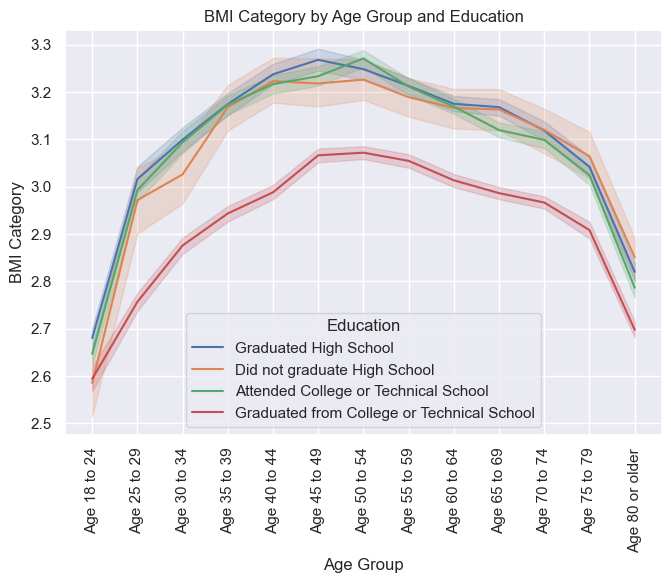

In [517]:
age_order = ['Age 18 to 24', 
             'Age 25 to 29', 
             'Age 30 to 34', 
             'Age 35 to 39',
             'Age 40 to 44', 
             'Age 45 to 49',
             'Age 50 to 54',
             'Age 55 to 59',
             'Age 60 to 64', 
             'Age 65 to 69', 
             'Age 70 to 74', 
             'Age 75 to 79',
             'Age 80 or older']
ndf['_AGEG5YR'] = pd.Categorical(ndf['_AGEG5YR'], categories=age_order, ordered=True)

sns.lineplot(data=ndf, x='_AGEG5YR', y='_BMI5CAT', hue='_EDUCAG', )
plt.xticks(rotation=90)
plt.title('BMI Category by Age Group and Education')
plt.xlabel('Age Group')
plt.ylabel('BMI Category')
plt.legend(title= 'Education')
plt.xticks(rotation=90)


## BMI Category in relation to age group

Text(0, 0.5, 'BMI Category')

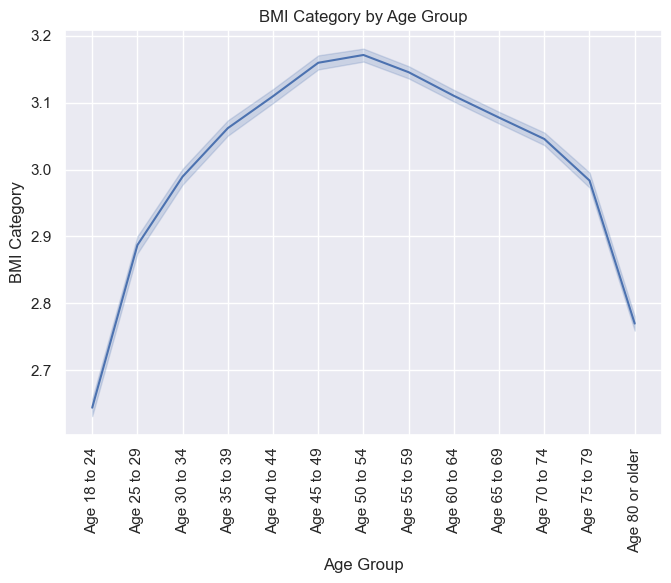

In [518]:
age_order = ['Age 18 to 24', 
             'Age 25 to 29', 
             'Age 30 to 34', 
             'Age 35 to 39',
             'Age 40 to 44', 
             'Age 45 to 49',
             'Age 50 to 54',
             'Age 55 to 59',
             'Age 60 to 64', 
             'Age 65 to 69', 
             'Age 70 to 74', 
             'Age 75 to 79',
             'Age 80 or older']

ndf['_AGEG5YR'] = pd.Categorical(ndf['_AGEG5YR'], categories=age_order, ordered=True)

sns.lineplot(data=ndf, x='_AGEG5YR', y='_BMI5CAT', legend= 'auto')
plt.xticks(rotation=90)
plt.title('BMI Category by Age Group')
plt.xlabel('Age Group')
plt.ylabel('BMI Category')


## BMI in relation to income

Text(52.57258333333333, 0.5, 'Number of participants')

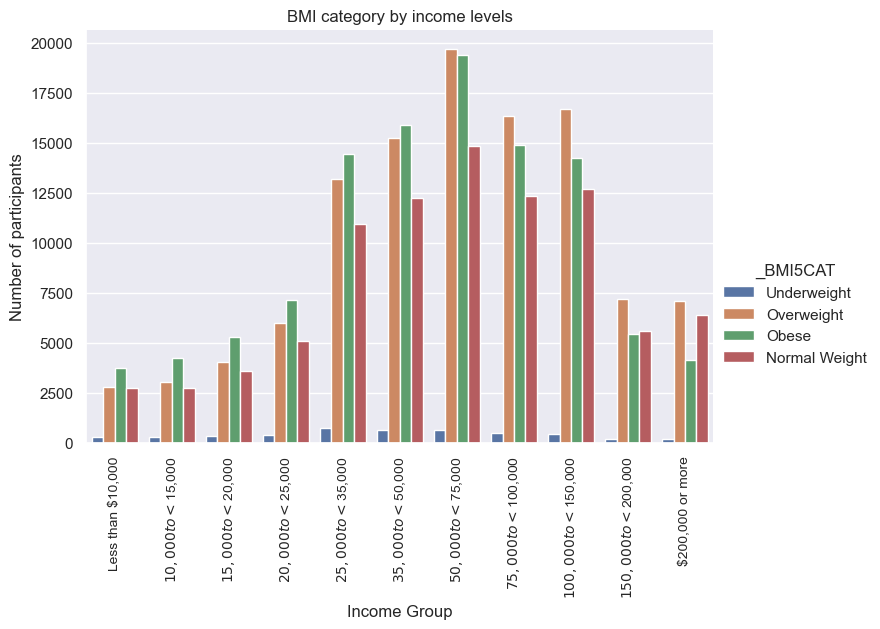

In [519]:
sns.catplot(data=ndf.replace({'_BMI5CAT':{1:'Underweight', 2:'Normal Weight', 3:'Overweight', 4:'Obese'}}),
            order= ["Less than $10,000", "$10,000 to < $15,000", 
                            "$15,000 to < $20,000",
                            "$20,000 to < $25,000", 
                            "$25,000 to < $35,000", 
                            "$35,000 to < $50,000", 
                            "$50,000 to < $75,000", 
                            "$75,000 to < $100,000", 
                            "$100,000 to < $150,000", 
                            "$150,000 to < $200,000",
                            "$200,000 or more"], x='INCOME3', hue="_BMI5CAT", kind="count", aspect=1.5)
plt.xticks(rotation=90, size=10)
plt.title('BMI category by income levels')
plt.xlabel('Income Group')
plt.ylabel('Number of participants')

Text(0, 0.5, 'BMI Category')

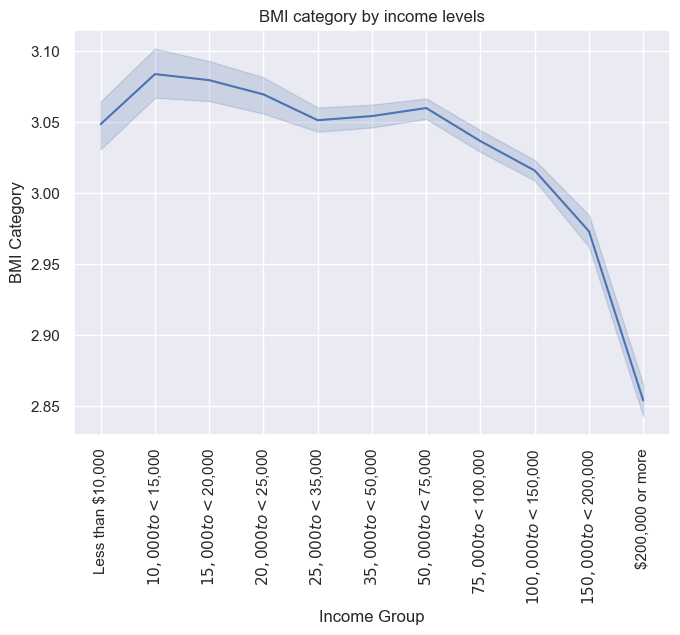

In [520]:
income = ["Less than $10,000", "$10,000 to < $15,000", 
                            "$15,000 to < $20,000",
                            "$20,000 to < $25,000", 
                            "$25,000 to < $35,000", 
                            "$35,000 to < $50,000", 
                            "$50,000 to < $75,000", 
                            "$75,000 to < $100,000", 
                            "$100,000 to < $150,000", 
                            "$150,000 to < $200,000",
                            "$200,000 or more"]
ndf['INCOME3'] = pd.Categorical(ndf['INCOME3'], categories=income, ordered=True)

sns.lineplot(data=ndf, x='INCOME3', y='_BMI5CAT', legend='auto')
plt.xticks(rotation=90)
plt.title('BMI category by income levels')
plt.xlabel('Income Group')
plt.ylabel('BMI Category')


## BMI in relation to race

Text(0, 0.5, 'BMI Category')

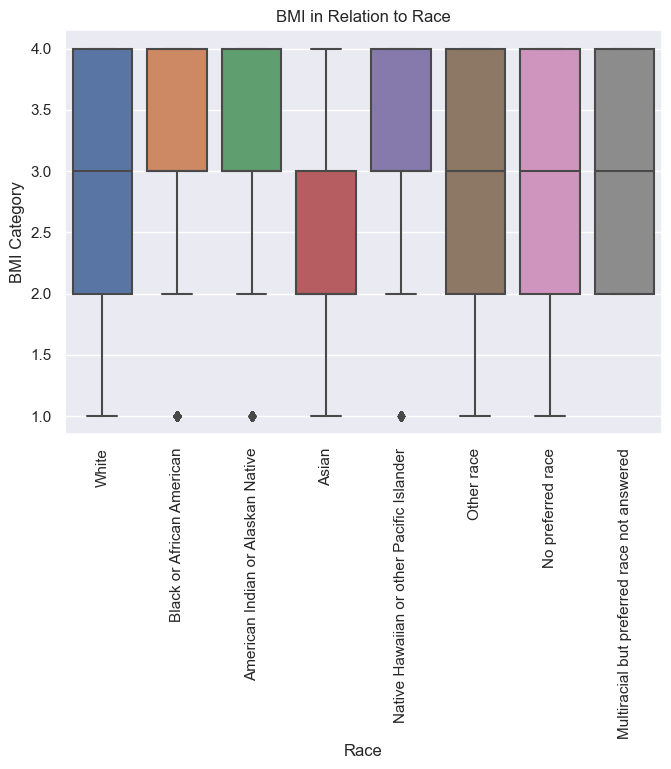

In [521]:
sns.boxplot(y='_BMI5CAT', x='_PRACE1', data=ndf, order=['White', 
                            'Black or African American', 
                            'American Indian or Alaskan Native', 
                            'Asian',
                            'Native Hawaiian or other Pacific Islander',
                            'Other race',
                            'No preferred race', 
                            'Multiracial but preferred race not answered'])
plt.xticks(rotation=90)
plt.title('BMI in Relation to Race')
plt.xlabel('Race')
plt.ylabel('BMI Category')

Text(0, 0.5, 'BMI')

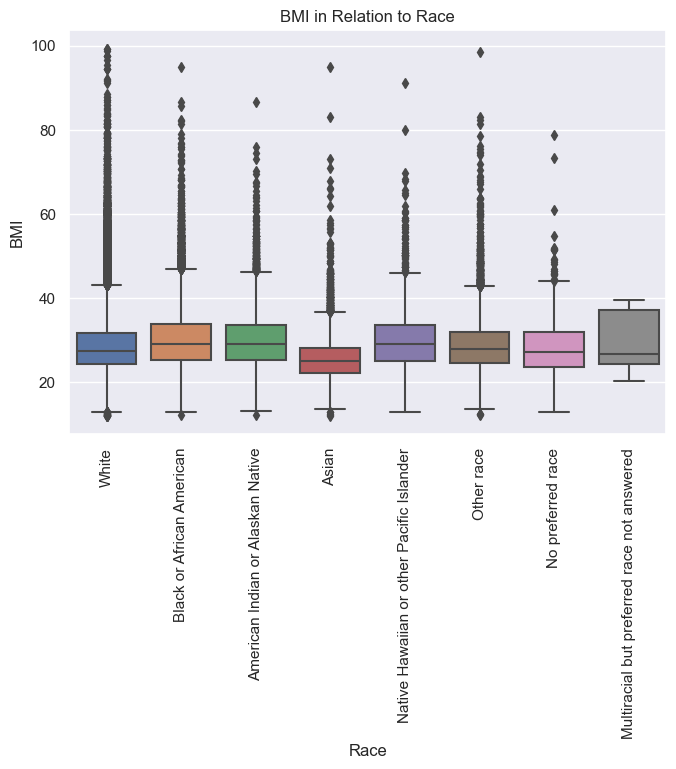

In [522]:
sns.boxplot(y='_BMI5', x='_PRACE1', data=ndf, order=['White', 
                            'Black or African American', 
                            'American Indian or Alaskan Native', 
                            'Asian',
                            'Native Hawaiian or other Pacific Islander',
                            'Other race',
                            'No preferred race', 
                            'Multiracial but preferred race not answered'])
plt.xticks(rotation=90)
plt.title('BMI in Relation to Race')
plt.xlabel('Race')
plt.ylabel('BMI')

## Correlation diagram with BMI and BMI Category

<Axes: >

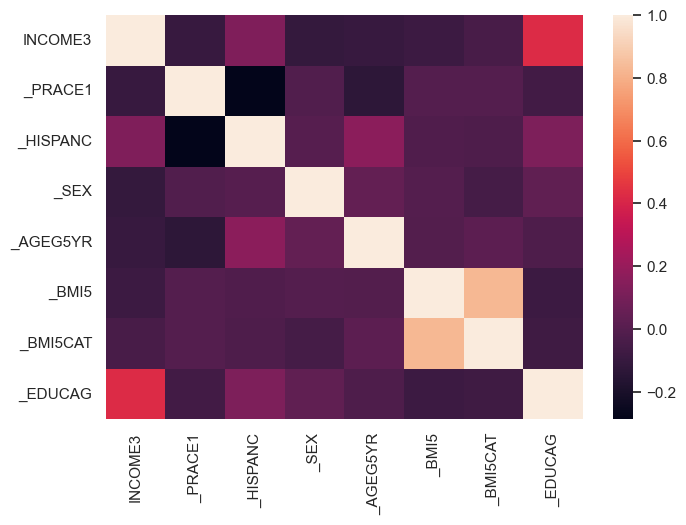

In [523]:
sns.heatmap(df.corr())

<Axes: >

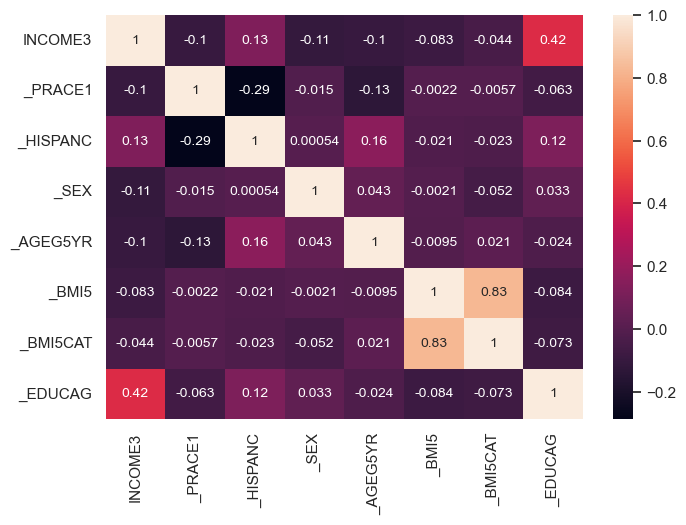

In [524]:
sns.heatmap(df.corr(), annot=True, annot_kws={'size':10})

## Correlation diagram with _BMI5CAT

<Axes: >

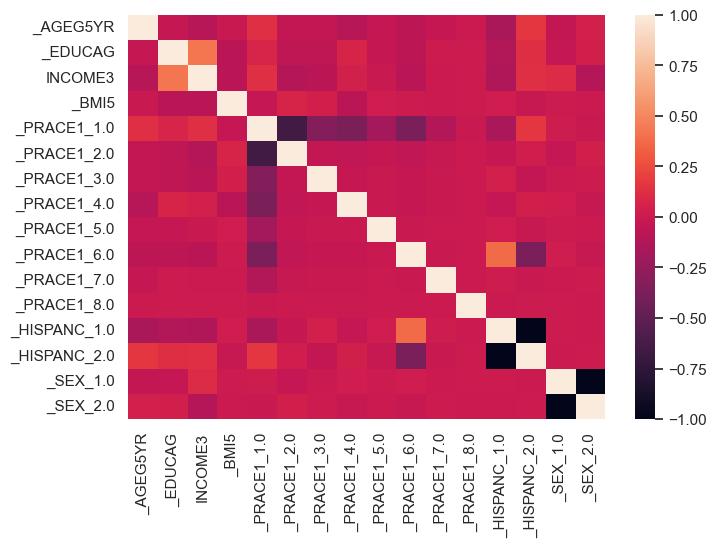

In [525]:
c_df= df[['_PRACE1','_HISPANC','_SEX', '_AGEG5YR','_EDUCAG','INCOME3','_BMI5']]
c_df=pd.get_dummies(data=c_df, columns=['_PRACE1','_HISPANC','_SEX'])
sns.heatmap(c_df.corr(), annot=False, annot_kws={'size':10}) 

##  Logistic Regression

In [526]:
## Create a new dataframe, drop unwanted columns, and set y as the target and X the predictor
log_df=pd.read_csv('C:/Users/tanis/Documents/C1/encoded_llcp2021.csv')
X=log_df.drop(columns=['Unnamed: 0','_BMI5CAT', 'Division','_BMI5'])
y = log_df['_BMI5CAT']


In [527]:
y.head()

0    1.0
1    3.0
2    4.0
3    3.0
4    2.0
Name: _BMI5CAT, dtype: float64

In [528]:
# Splitting the dataset
X_train,  X_test, y_train, y_test=train_test_split(X, y, test_size=0.33, random_state=42)

In [529]:
# Scaling the data
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [530]:
print(X_test.mean(axis=0))
print(X_test.std(axis=0))

[-0.00329491 -0.00013403 -0.00714772  0.0018755  -0.00077964  0.00109229
  0.00459149 -0.00379008  0.00478417 -0.00468425  0.00265864  0.00032067
 -0.00208322  0.00343023 -0.00189367 -0.00460052 -0.00168396  0.00067034
 -0.00171421  0.00037474  0.00096113 -0.00066249 -0.00312452  0.00250498
 -0.00294225 -0.00030399 -0.00622881  0.00292356 -0.00057621 -0.00135986
 -0.00191219  0.00682394  0.0042112  -0.00711413 -0.00317917  0.00652417
 -0.00726618 -0.00183173 -0.00497671 -0.00219519  0.00175987  0.00267804
  0.00237503  0.00556521  0.0023873   0.00557149 -0.00348647 -0.00363531
 -0.00708353 -0.00251259]
[0.99423582 0.99770988 1.00459616 1.00192621 0.9997188  0.99876102
 1.00693927 0.99397881 0.99989222 1.00124466 1.00538576 1.00270385
 0.98437517 1.08144407 0.97988694 0.9317499  1.05793357 1.1280425
 0.95710449 1.00065266 0.99876574 1.00001117 0.90821095 1.00041833
 0.97585083 0.99944121 0.99722816 1.04630984 0.99857467 0.99713185
 0.99433225 1.01031356 1.01254559 0.98239679 1.00164631 

In [531]:
print(X_test.min(axis=0))
print(X_test.max(axis=0))

[-0.46117365 -0.51946763 -1.83971512 -0.40587554 -0.70266663 -2.40787351
 -0.2996364  -0.28955746 -1.02033732 -1.90068863 -0.51988674 -2.27605547
 -0.34912739 -0.27309122 -0.65046303 -0.43468444 -0.34653289 -0.39208568
 -0.57044461 -3.60278793 -2.71199871 -2.31133668 -0.01783414 -0.84577487
 -0.06144115 -0.25448584 -0.65176034 -0.03081882 -0.19463567 -0.22541296
 -0.16463789 -0.29902556 -0.16228303 -0.19629313 -1.64691393 -0.55003981
 -0.15342244 -0.16585944 -0.2997939  -0.00445787 -0.07715033 -0.05467856
 -0.17091401 -2.21325345 -0.6542758  -0.51806442 -0.1006585  -0.56987323
 -0.0566983  -0.54694369]
[  3.19205458   3.18791586   0.54356242   2.4638095    1.42314997
   1.75494583   3.3373782    3.45354595   0.98006804   1.58360667
   4.45860579   0.97833641  59.24885922  89.52226845  57.05851091
  72.99370597 143.24901688 138.62639103  52.03397908   2.32840653
   3.69534776   3.84875937  56.07221906   1.18234774  16.27573666
   3.9294917    1.53430631  32.44770259   5.13780428   4.436

In [532]:
#Creating the Logistic Regression model
logr=LogisticRegression(multi_class='multinomial', solver="lbfgs", random_state=42, max_iter=4000)
logr.fit(X_train, y_train)

# Predicting obesity using the model
pred_y=logr.predict(X_test)

# Print intercept, prediction accuracy and Mean Squared Error (mse)
print(pd.DataFrame(zip(X_train, logr.coef_)))
print('\nIntercept:', logr.intercept_)
print('r2:', logr.score(X_test, y_test))
print('mse', mse(pred_y,y_test))

                                                   0  \
0  [-0.3393993717304735, 0.7163268678677934, 0.54...   
1  [-0.46117364578385617, -0.5194676276688472, 0....   
2  [-0.46117364578385617, -0.5194676276688472, 0....   
3  [2.0960861093371794, -0.5194676276688472, 0.54...   

                                                   1  
0  [0.1096192530532891, 0.059107253492652556, -0....  
1  [-0.04617753981853703, -0.030796237718298352, ...  
2  [-0.07139007682206473, -0.036345058632877666, ...  
3  [0.007948363587315153, 0.008034042858522121, -...  

Intercept: [-2.47868103  0.66566831  0.93508579  0.87792693]
r2: 0.44184099574347907
mse 1.024520384902463


In [533]:
#Another way to get the prediction accuracy
sum(pred_y.tolist()==y_test)/len(y_test)

0.44184099574347907

In [534]:
#Print confusion matrix
confusion_matrix(y_test, pred_y)

array([[    0,   487,   328,   546],
       [    0,  9656, 10361,  8084],
       [    0,  7146, 16905, 11260],
       [    0,  5544, 11581, 17244]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression')

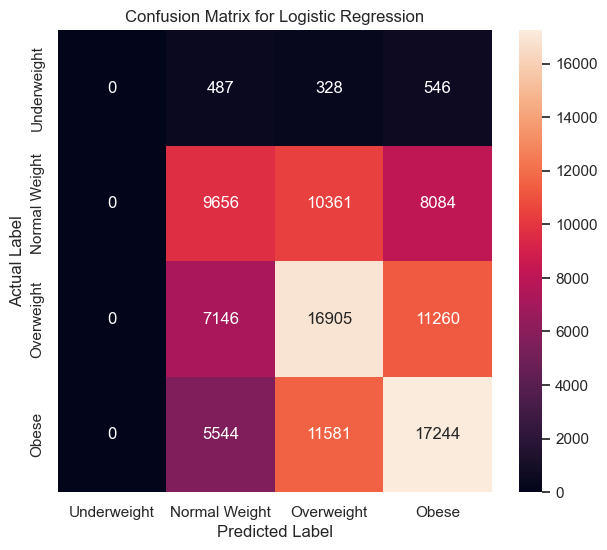

In [535]:
#Print confusion matrix Diagram
fig, ax= plt.subplots(figsize=(7,6))
ax= sns.heatmap(confusion_matrix(y_test, pred_y), annot=True, fmt='d')
ax.xaxis.set_ticklabels(["Underweight","Normal Weight","Overweight", "Obese"])
ax.set_xlabel("Predicted Label")
ax.yaxis.set_ticklabels(["Underweight","Normal Weight","Overweight", "Obese"])
ax.set_ylabel("Actual Label")
ax.set_title('Confusion Matrix for Logistic Regression')

In [536]:
#Print Logistic regression classfication report
tnames = ['Underweight', 'Normal Weight', 'Overweight','Obese']
print(classification_report(y_test, pred_y, target_names=tnames))

C:\Users\tanis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tanis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

  Underweight       0.00      0.00      0.00      1361
Normal Weight       0.42      0.34      0.38     28101
   Overweight       0.43      0.48      0.45     35311
        Obese       0.46      0.50      0.48     34369

     accuracy                           0.44     99142
    macro avg       0.33      0.33      0.33     99142
 weighted avg       0.43      0.44      0.44     99142



C:\Users\tanis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
